In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [2]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [3]:
mask_path = "dataset\\annotated_images"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'dataset\annotated_images'...
['cat.0.png', 'cat.1.png', 'cat.10.png', 'cat.100.png', 'cat.101.png', 'cat.108.png', 'cat.11.png', 'cat.12.png', 'cat.126.png', 'cat.13.png', 'cat.14.png', 'cat.15.png', 'cat.152.png', 'cat.16.png', 'cat.17.png', 'cat.175.png', 'cat.18.png', 'cat.182.png', 'cat.19.png', 'cat.2.png', 'cat.20.png', 'cat.2042.png', 'cat.21.png', 'cat.2116.png', 'cat.22.png', 'cat.23.png', 'cat.237.png', 'cat.2390.png', 'cat.24.png', 'cat.2407.png', 'cat.2417.png', 'cat.2429.png', 'cat.2461.png', 'cat.2469.png', 'cat.2485.png', 'cat.25.png', 'cat.26.png', 'cat.266.png', 'cat.27.png', 'cat.28.png', 'cat.29.png', 'cat.3.png', 'cat.30.png', 'cat.31.png', 'cat.32.png', 'cat.326.png', 'cat.328.png', 'cat.33.png', 'cat.34.png', 'cat.35.png', 'cat.36.png', 'cat.37.png', 'cat.38.png', 'cat.39.png', 'cat.4.png', 'cat.40.png', 'cat.41.png', 'cat.42.png', 'cat.427.png', 'cat.43.png', 'cat.44.png', 'cat.45.png', 'cat.46.png', 'cat.47.png', 'cat.471.png', 'cat.48.png', '

Finding unique colors: 100%|██████████| 255/255 [00:23<00:00, 10.73it/s]


Scan complete!
Found 3 unique classes.


{(np.uint8(0), np.uint8(0), np.uint8(0)): 0,
 (np.uint8(0), np.uint8(128), np.uint8(0)): 1,
 (np.uint8(128), np.uint8(0), np.uint8(0)): 2}

In [4]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale

In [5]:
mask_path = "dataset\\annotated_images\\cat.26.png" 
grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

In [6]:
from glob import glob

mask_files = glob(os.path.join("dataset", "annotated_images", "*.*"))
print(mask_files)

['dataset\\annotated_images\\cat.0.png', 'dataset\\annotated_images\\cat.1.png', 'dataset\\annotated_images\\cat.10.png', 'dataset\\annotated_images\\cat.100.png', 'dataset\\annotated_images\\cat.101.png', 'dataset\\annotated_images\\cat.108.png', 'dataset\\annotated_images\\cat.11.png', 'dataset\\annotated_images\\cat.12.png', 'dataset\\annotated_images\\cat.126.png', 'dataset\\annotated_images\\cat.13.png', 'dataset\\annotated_images\\cat.14.png', 'dataset\\annotated_images\\cat.15.png', 'dataset\\annotated_images\\cat.152.png', 'dataset\\annotated_images\\cat.16.png', 'dataset\\annotated_images\\cat.17.png', 'dataset\\annotated_images\\cat.175.png', 'dataset\\annotated_images\\cat.18.png', 'dataset\\annotated_images\\cat.182.png', 'dataset\\annotated_images\\cat.19.png', 'dataset\\annotated_images\\cat.2.png', 'dataset\\annotated_images\\cat.20.png', 'dataset\\annotated_images\\cat.2042.png', 'dataset\\annotated_images\\cat.21.png', 'dataset\\annotated_images\\cat.2116.png', 'datase

In [ ]:
import matplotlib.pyplot as plt
for mask_path in mask_files:
    grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)
    save_path = os.path.join("dataset", "encoded_images", os.path.basename(mask_path))
    cv2.imwrite(save_path, grayscale_label_mask)

### Reread the encoded mask

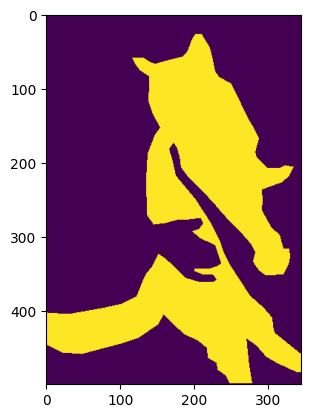

In [8]:
new_grayscale_label_mask = cv2.imread("dataset\\encoded_images\\cat.25.png")
new_grayscale_label_mask = cv2.cvtColor(new_grayscale_label_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(new_grayscale_label_mask)